<a href="https://colab.research.google.com/github/honi-sm/AmphiBIO_TraitAnalysisFinal/blob/main/01DescriptiveAnalysisFinalPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Descriptive Stats
# Purpose: descriptive statistics and visualizations to see trends
# This notebook does NOT modify the dataset and does NOT perform confirmatory hypothesis testing.

In [ ]:
#github fetching from repo
!git clone https://github.com/honi-sm/AmphiBIO_TraitAnalysisFinal.git

import os
os.chdir("/content/AmphiBIO_TraitAnalysisFinal")

Cloning into 'AmphiBIO_TraitAnalysisFinal'...
remote: Enumerating objects: 106, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 106 (delta 37), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (106/106), 2.77 MiB | 10.06 MiB/s, done.
Resolving deltas: 100% (37/37), done.


In [ ]:
#IMPORTS AND INFR. STAT PREP

# System
import os, sys, time, warnings
from dataclasses import dataclass
from typing import Optional

warnings.filterwarnings("ignore")

# The usuals
import numpy as np
import pandas as pd

# Seed from earlier (same 500 sample)
SEED = 2025
np.random.seed(SEED)

# Stats needed
import scipy
from scipy import stats
from scipy.stats import chi2_contingency, spearmanr

# Post hoc tests
!pip -q install scikit-posthocs pingouin
import scikit_posthocs as sp
import pingouin as pg

# Graphs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.rcParams["figure.dpi"] = 120

# PCA
from sklearn.decomposition import PCA
!pip -q install umap-learn
import umap

# ML
from sklearn.model_selection import (
    train_test_split,
    KFold,
    StratifiedKFold,
    cross_val_score
)
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Versions used (to cite in paper)
import sklearn

print("Python:", sys.version.split()[0])
print("numpy:", np.__version__)
print("pandas:", pd.__version__)
print("scipy:", scipy.__version__)
print("statsmodels:", sm.__version__)
print("seaborn:", sns.__version__)
print("sklearn:", sklearn.__version__)
print("umap-learn:", umap.__version__)
print("pingouin:", pg.__version__)
print("scikit-posthocs:", sp.__version__)
print("SEED =", SEED)

Python: 3.12.12
numpy: 2.0.2
pandas: 2.2.2
scipy: 1.16.3
statsmodels: 0.14.6
seaborn: 0.13.2
sklearn: 1.6.1
umap-learn: 0.5.9.post2
pingouin: 0.5.5
scikit-posthocs: 0.11.4
SEED = 2025


In [ ]:
#Get the sample in here
for root, dirs, files in os.walk(".", topdown=True):
    for name in files:
        if "sample500" in name:
            print(os.path.join(root, name))

./Data/Processed/sample500_with_logs (1).csv


In [ ]:
"""
AmphiBIO Descriptive Analysis
Author: Lia Grace Stratos
Institution: University of Nebraska Omaha
Date: December 2025

Purpose:
Visualize structure, distribution, and variability of key amphibian traits in
a cleaned, log10-transformed 500-species AmphiBIO sample (seed = 2025).
Provides descriptive context for the next inferential analyses
by showin trait ranges, group distributions, and relationships without formal hypothesis testing.
The goal is to understand what the data look like before asking whether
observed differences or relationships are statistically significant.

Inputs:
- Cleaned dataset: 500-species random sample (seed = 2025)
- Continuous traits (log10-transformed):
    * logBodyLengthMm
    * logClutchSizeMinN
    * logClutchSizeMaxN
- Categorical variables:
    * reproductiveMethod (direct / larval / viviparous)
    * habitatClass (engineered categorical variable; reduces sparsity)

Descriptive Questions:
1) What are the central tendencies and spreads of key continuous traits?
2) How are body size and clutch size distributed overall and within groups?
3) How do trait distributions differ visually across reproductive methods?
4) How are species distributed across habitat classes and reproductive modes?
5) What pairwise relationships exist among continuous traits?
These questions are not inferential.

Biological Background/Research:(Oliveira et al., 2017):
- Body size and clutch size vary widely across species and ecologies.
- Direct development is often associated with reduced clutch size.
- Larval strategies tend to show greater variance in reproductive output.
- Habitat categories may unevenly represent reproductive strategies.

Descriptive analysis allows patterns to be visualized and summarized without assuming causal structure

Methods:
1) Univariate summaries
   - Mean, median, standard deviation, interquartile range
   - Distribution shape (histograms, density plots)
   - Log-scale visualization for skewed traits
2) Group-wise summaries
   - Stratification by reproductiveMethod
   - Boxplots / violin plots for visual comparison
   - Group counts and proportions
3) Categorical structure
   - Frequency tables for habitatClass and reproductiveMethod
   - Cross-tabulations to assess representation and sparsity
4) Pairwise relationships
   - Scatterplots of continuous traits
   - Spearman correlation matrix (descriptive, not tested)

Assumptions:
- Log10 transformation is used to stabilize variance from right-skew
- No!!! formal hypothesis tests are conducted in this notebook
- All summaries are descriptive and intended to inform paper only
- Patterns observed here are interpreted only for future method choice and
not as evidence of statistical significance

Outputs:
- Summary statistics tables for continuous traits
- Distribution plots (histograms, density plots)
- Grouped boxplots / violin plots by reproductive method + habitatClass
- Frequency tables for categorical variables
- Pairwise scatterplots and correlation heatmaps

This notebook establishes the CONTEXT ONLY for inferential analysis
"""

'\nAmphiBIO Descriptive Analysis\nAuthor: Lia Grace Stratos\nInstitution: University of Nebraska Omaha\nDate: December 2025\n\nPurpose:\nVisualize structure, distribution, and variability of key amphibian traits in\na cleaned, log10-transformed 500-species AmphiBIO sample (seed = 2025). \nProvides descriptive context for the next inferential analyses\nby showin trait ranges, group distributions, and relationships without formal hypothesis testing.\nThe goal is to understand what the data look like before asking whether\nobserved differences or relationships are statistically significant.\n\nInputs:\n- Cleaned dataset: 500-species random sample (seed = 2025)\n- Continuous traits (log10-transformed):\n    * logBodyLengthMm\n    * logClutchSizeMinN\n    * logClutchSizeMaxN\n- Categorical variables:\n    * reproductiveMethod (direct / larval / viviparous)\n    * habitatClass (engineered categorical variable; reduces sparsity)\n\nDescriptive Questions:\n1) What are the central tendencies an

In [ ]:
# LIBRARY SETUP

@dataclass(frozen=True)
class ColumnSpec:
    name: str
    dtype: str
    description: str
    allowed: Optional[List[str]] = None
    source: Optional[str] = None
    transform: Optional[str] = None
    usedIn: Optional[List[str]] = None


columnSpecs: Dict[str, ColumnSpec] = {
    "Species": ColumnSpec(
        name="Species",
        dtype="string",
        description="Species scientific name (unique ID)",
        source="input",
        usedIn=["group summaries", "QA"]
    ),

    "habitatType": ColumnSpec(
        name="habitatType",
        dtype="string",
        description="Raw habitat composite label (contains '+' for combos)",
        source="input",
        usedIn=["traitMaking(habitatClass)"]
    ),

    "habitatClass": ColumnSpec(
        name="habitatClass",
        dtype="category",
        description="Habitat category collapsed from habitatType (concise)",
        source="made",
        transform="classifyHabitat(habitatType)",
        allowed=[
            "aquatic-only", "aquatic-associated",
            "arboreal-only", "arboreal-associated",
            "terrestrial-only", "terrestrial-associated",
            "generalist", "other"
        ],
        usedIn=["group summaries", "crosstabs", "figures"]
    ),

    "reproductiveMethod": ColumnSpec(
        name="reproductiveMethod",
        dtype="category",
        description="Reproductive mode category",
        source="input or made",
        allowed=["direct", "larval", "viviparous"],
        usedIn=["group summaries", "figures"]
    ),

    "bodyLengthMm": ColumnSpec(
        name="bodyLengthMm",
        dtype="numeric",
        description="Body length in millimeters (raw scale)",
        source="input",
        usedIn=["QA", "summaries"]
    ),

    "clutchSizeMinN": ColumnSpec(
        name="clutchSizeMinN",
        dtype="numeric",
        description="Minimum clutch size (count)",
        source="input",
        usedIn=["QA", "summaries"]
    ),

    "clutchSizeMaxN": ColumnSpec(
        name="clutchSizeMaxN",
        dtype="numeric",
        description="Maximum clutch size (count)",
        source="input",
        usedIn=["QA", "summaries"]
    ),

    "logBodyLengthMm": ColumnSpec(
        name="logBodyLengthMm",
        dtype="numeric",
        description="log10(bodyLengthMm)",
        source="made or input",
        transform="log10(bodyLengthMm)",
        usedIn=["distributions", "pairwise"]
    ),

    "logClutchSizeMinN": ColumnSpec(
        name="logClutchSizeMinN",
        dtype="numeric",
        description="log10(clutchSizeMinN)",
        source="made or input",
        transform="log10(clutchSizeMinN)",
        usedIn=["distributions", "pairwise"]
    ),

    "logClutchSizeMaxN": ColumnSpec(
        name="logClutchSizeMaxN",
        dtype="numeric",
        description="log10(clutchSizeMaxN)",
        source="made or input",
        transform="log10(clutchSizeMaxN)",
        usedIn=["distributions", "pairwise"]
    ),
}

# Standardize names
columnAliases: Dict[str, str] = {
    "log_bodyLengthMm": "logBodyLengthMm",
    "log_clutchSizeMinN": "logClutchSizeMinN",
    "log_clutchSizeMaxN": "logClutchSizeMaxN",
    "HabitatClass": "habitatClass",
    "HabitatType": "habitatType",
    "ReproductiveMethod": "reproductiveMethod",
}

# Build habitatClass
def classifyHabitat(h):
    if pd.isna(h):
        return "other"

    parts = [p.strip().lower() for p in str(h).split("+") if p.strip()]
    n = len(parts)

    hasT  = "terrestrial" in parts
    hasAq = "aquatic" in parts
    hasAr = "arboreal" in parts

    if n >= 3:
        return "generalist"
    if n == 1 and hasAq:
        return "aquatic-only"
    if hasAq and n == 2:
        return "aquatic-associated"
    if n == 1 and hasT:
        return "terrestrial-only"
    if hasT and n == 2:
        return "terrestrial-associated"
    if n == 1 and hasAr:
        return "arboreal-only"
    if hasAr and n == 2 and (not hasAq) and (not hasT):
        return "arboreal-associated"
    return "other"


def addHabitatClass(df, source_col="habitatType", out_col="habitatClass"):
    if source_col not in df.columns:
        raise KeyError(f"{source_col} column missing for {out_col}.")
    df = df.copy()
    df[out_col] = df[source_col].apply(classifyHabitat).astype("string")
    return df


# Helper Functions
def showDataLibrary() -> pd.DataFrame:
    """Pretty summary table of data dictionary"""
    rows = []
    for spec in columnSpecs.values():
        rows.append({
            "column": spec.name,
            "dtype": spec.dtype,
            "description": spec.description,
            "allowed": ", ".join(spec.allowed) if spec.allowed else "",
            "source": spec.source or "",
            "transform": spec.transform or "",
            "usedIn": ", ".join(spec.usedIn) if spec.usedIn else "",
        })
    return pd.DataFrame(rows)

def standardizeColumnNames(df: pd.DataFrame) -> pd.DataFrame:
    """Standardize aliases"""
    return df.rename(columns={k: v for k, v in columnAliases.items() if k in df.columns})

def normalizeCategoricals(df: pd.DataFrame) -> pd.DataFrame:
    """Lowercase/strip categoricals (safe normalization for plotting + tables)."""
    df = df.copy()
    for col in ["reproductiveMethod", "habitatType", "habitatClass"]:
        if col in df.columns:
            df[col] = df[col].astype("string").str.strip().str.lower()

    for col in ["reproductiveMethod", "habitatClass"]:
        if col in df.columns:
            df[col] = df[col].astype("category")

    return df


def validateSchema(df: pd.DataFrame, strict: bool = True) -> Dict[str, Any]:
    """
    Presence + type + allowed categories
    strict=True raises; strict=False returns issues dict.
    """
    issues = {"missing": [], "badType": [], "badValues": []}

    for name, spec in columnSpecs.items():
        if name not in df.columns:
            issues["missing"].append(name)
            continue

        if spec.dtype == "numeric":
            if not pd.api.types.is_numeric_dtype(df[name]):
                issues["badType"].append((name, str(df[name].dtype), "numeric"))

        elif spec.dtype in ("string", "category"):
            if str(df[name].dtype) not in ("string", "object", "category"):
                issues["badType"].append((name, str(df[name].dtype), spec.dtype))

        if spec.allowed:
            observed = set(df[name].dropna().astype("string").str.lower().unique())
            allowed = set(a.lower() for a in spec.allowed)
            bad = sorted(list(observed - allowed))
            if bad:
                issues["badValues"].append((name, bad))

    if strict and (issues["missing"] or issues["badType"] or issues["badValues"]):
        msg = ["SCHEMA VALIDATION FAILED"]
        if issues["missing"]:
            msg.append(f"Missing: {issues['missing']}")
        if issues["badType"]:
            msg.append(f"Bad dtypes: {issues['badType']}")
        if issues["badValues"]:
            msg.append(f"Bad categorical values: {issues['badValues']}")
        raise ValueError("\n".join(msg))

    return issues


# Preddy colors
jewel = ["#6A5ACD", "#20B2AA", "#C77DFF", "#FF6B6B", "#4CC9F0"]
jewel_dark = ["#4B3FA6", "#1C8C7D", "#9F5ACC", "#CC5555", "#379AC2"]


# Table of Contents
print("Sections:")
print("1) Check data")
print("2) HabitatClass concisety")
print("3) Continuous Trait distributions")
print("4) Traits by Reproductive Method")
print("5) Pairwise Relationships")
print("6) Synthesis")
print("7) Exports tables/figures")

display(showDataLibrary())

Sections:
1) Check data
2) HabitatClass concisety
3) Continuous Trait distributions
4) Traits by Reproductive Method
5) Pairwise Relationships
6) Synthesis
7) Exports tables/figures


,column,dtype,description,allowed,source,transform,usedIn
0,Species,string,Species scientific name (unique ID),,input,,"group summaries, QA"
1,habitatType,string,Raw habitat composite label (contains '+' for ...,,input,,traitMaking(habitatClass)
2,habitatClass,category,Habitat category collapsed from habitatType (c...,"aquatic-only, aquatic-associated, arboreal-onl...",made,classifyHabitat(habitatType),"group summaries, crosstabs, figures"
3,reproductiveMethod,category,Reproductive mode category,"direct, larval, viviparous",input or made,,"group summaries, figures"
4,bodyLengthMm,numeric,Body length in millimeters (raw scale),,input,,"QA, summaries"
5,clutchSizeMinN,numeric,Minimum clutch size (count),,input,,"QA, summaries"
6,clutchSizeMaxN,numeric,Maximum clutch size (count),,input,,"QA, summaries"
7,logBodyLengthMm,numeric,log10(bodyLengthMm),,made or input,log10(bodyLengthMm),"distributions, pairwise"
8,logClutchSizeMinN,numeric,log10(clutchSizeMinN),,made or input,log10(clutchSizeMinN),"distributions, pairwise"
9,logClutchSizeMaxN,numeric,log10(clutchSizeMaxN),,made or input,log10(clutchSizeMaxN),"distributions, pairwise"


In [ ]:
#finish prep
from typing import Optional
import pandas as pd

class DatasetBase:
    def __init__(self, dataPath: str):
        self.dataPath = dataPath
        self.df: Optional[pd.DataFrame] = None

    def load(self):
        self.df = pd.read_csv(self.dataPath)
        print(f"Loaded: {self.dataPath}")
        print(f"Shape: {self.df.shape}")
        return self


class AmphiBIODataset(DatasetBase):
    def prep(self, strict_schema: bool = False):
        """
        PREP:
        1) standardize names
        2) normalize categoricals
        3) make habitatClass
        4) double check
        """
        if self.df is None:
            raise RuntimeError("Call .load() before .prep().")

        # 1) standardize
        self.df = standardizeColumnNames(self.df)

        # 2) normalize
        self.df = normalizeCategoricals(self.df)

        # 3) make habitatclass
        if "habitatClass" not in self.df.columns:
            self.df = addHabitatClass(self.df)

        # 4) doublecheck
        issues = validateSchema(self.df, strict=strict_schema)

        print("Prep complete")
        if issues:
            print("Schema issues:", issues)

        return self

In [ ]:
dataPath = "./Data/Processed/sample500_with_logs (1).csv"

ds = AmphiBIODataset(dataPath).load().prep(strict_schema=False)
df = ds.df

df["habitatClass"].value_counts(dropna=False)
df.head()

Loaded: ./Data/Processed/sample500_with_logs (1).csv
Shape: (500, 9)
Prep complete
Schema issues: {'missing': [], 'badType': [], 'badValues': []}


,Species,bodyLengthMm,clutchSizeMinN,clutchSizeMaxN,habitatType,reproductiveMethod,logBodyLengthMm,logClutchSizeMinN,logClutchSizeMaxN,habitatClass
0,atelopus cruciger,50.0,271.0,271.0,terrestrial + aquatic,larval,1.698970,2.432969,2.432969,aquatic-associated
1,limnonectes microdiscus,70.0,53.0,53.0,terrestrial + aquatic,larval,1.845098,1.724276,1.724276,aquatic-associated
2,hyla savignyi,49.0,200.0,1000.0,aquatic + arboreal,larval,1.690196,2.301030,3.000000,aquatic-associated
3,scinax littoralis,39.9,398.0,701.0,terrestrial + aquatic + arboreal,larval,1.600973,2.599883,2.845718,generalist
4,lithobates forreri,114.0,100.0,100.0,terrestrial + aquatic,larval,2.056905,2.000000,2.000000,aquatic-associated


In [ ]:
assert "habitatClass" in df.columns
assert df["habitatClass"].isna().sum() == 0

In [ ]:
# Inspect data from prepared: ds = AmphiBIODataset(dataPath).load().prep()
# ONLY inspects ds.df and does NOT modify it.

df = ds.df  # new from prep

print("After Prep")
print("Shape:", df.shape)

print("\nColumns:")
for c in df.columns:
    print(" -", c)

from IPython.display import display

# Random preview to check all over the 500 sample
display(df.sample(8, random_state=2025))

print("\nInfo:")
df.info()

print("\nNumeric summary:")
display(df.describe(include=[np.number]).T)

print("\nCategorical summary:")
display(df.describe(include=["string", "object", "category"]).T)

After Prep
Shape: (500, 10)

Columns:
 - Species
 - bodyLengthMm
 - clutchSizeMinN
 - clutchSizeMaxN
 - habitatType
 - reproductiveMethod
 - logBodyLengthMm
 - logClutchSizeMinN
 - logClutchSizeMaxN
 - habitatClass


,Species,bodyLengthMm,clutchSizeMinN,clutchSizeMaxN,habitatType,reproductiveMethod,logBodyLengthMm,logClutchSizeMinN,logClutchSizeMaxN,habitatClass
34,phyllobates aurotaenia,34.0,30.0,30.0,terrestrial + aquatic,larval,1.531479,1.477121,1.477121,aquatic-associated
400,calotriton asper,160.0,20.0,30.0,terrestrial + aquatic,larval,2.204120,1.301030,1.477121,aquatic-associated
239,hypsiboas crepitans,75.0,1064.0,2131.0,terrestrial + arboreal,larval,1.875061,3.026942,3.328583,terrestrial-associated
413,anotheca spinosa,80.0,48.0,317.0,terrestrial + aquatic + arboreal,larval,1.903090,1.681241,2.501059,generalist
65,hyperolius viridiflavus,34.0,12.0,650.0,terrestrial + arboreal,larval,1.531479,1.079181,2.812913,terrestrial-associated
422,ranitomeya amazonica,19.0,1.0,6.0,terrestrial + arboreal,larval,1.278754,0.000000,0.778151,terrestrial-associated
414,pipa aspera,45.0,12.0,26.0,fossorial + aquatic,direct,1.653213,1.079181,1.414973,aquatic-associated
182,pseudacris nigrita,32.0,59.0,800.0,fossorial + terrestrial + aquatic,larval,1.505150,1.770852,2.903090,generalist



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Species             500 non-null    object  
 1   bodyLengthMm        500 non-null    float64 
 2   clutchSizeMinN      500 non-null    float64 
 3   clutchSizeMaxN      500 non-null    float64 
 4   habitatType         499 non-null    string  
 5   reproductiveMethod  500 non-null    category
 6   logBodyLengthMm     500 non-null    float64 
 7   logClutchSizeMinN   500 non-null    float64 
 8   logClutchSizeMaxN   500 non-null    float64 
 9   habitatClass        500 non-null    string  
dtypes: category(1), float64(6), object(1), string(2)
memory usage: 35.9+ KB

Numeric summary:


,count,mean,std,min,25%,50%,75%,max
bodyLengthMm,500.0,73.727680,96.575137,13.300000,33.000000,50.000000,81.700000,1360.000000
clutchSizeMinN,500.0,588.756000,1679.104571,1.000000,20.000000,101.500000,300.000000,15000.000000
clutchSizeMaxN,500.0,1055.646000,2569.734362,1.000000,35.500000,217.500000,990.000000,25500.000000
logBodyLengthMm,500.0,1.738716,0.296750,1.123852,1.518514,1.698970,1.912221,3.133539
logClutchSizeMinN,500.0,1.959355,0.876823,0.000000,1.301030,2.006461,2.477121,4.176091
logClutchSizeMaxN,500.0,2.283959,0.870465,0.000000,1.550097,2.337458,2.995635,4.406540



Categorical summary:


,count,unique,top,freq
Species,500,500,philoria kundagungan,1
habitatType,499,11,terrestrial + aquatic,151
reproductiveMethod,500,3,larval,416
habitatClass,500,7,generalist,191


In [ ]:
# Check habitatClass
for col in ["habitatClass", "reproductiveMethod"]:
    print(f"\n{col} counts:")
    display(df[col].value_counts().to_frame("count"))

# Distributional columns and rows
print("Shape:", df.shape)

categorical_cols = df.select_dtypes(include=["string", "object", "category"]).columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

print("\nCategorical columns:")
print(list(categorical_cols))

print("\nNumeric columns:")
print(list(numeric_cols))


habitatClass counts:


,count
habitatClass,
generalist,191
aquatic-associated,167
terrestrial-associated,70
terrestrial-only,46
arboreal-only,16
other,6
aquatic-only,4



reproductiveMethod counts:


,count
reproductiveMethod,
larval,416
direct,82
viviparous,2


Shape: (500, 10)

Categorical columns:
['Species', 'habitatType', 'reproductiveMethod', 'habitatClass']

Numeric columns:
['bodyLengthMm', 'clutchSizeMinN', 'clutchSizeMaxN', 'logBodyLengthMm', 'logClutchSizeMinN', 'logClutchSizeMaxN']


In [ ]:
# Data Prep complete

# DESCRIPTIVE PLAN
# 1) Check data (raw vs log)
# 2) HabitatClass concisety
# 3) Continuous Trait distributions
# 4) Traits by Reproductive Method
# 5) Pairwise Relationships
# 6) Synthesis
# 7) Exports tables/figures

In [ ]:
#descriptive summ stats raw vs log (Check data)

traits_raw = ["bodyLengthMm", "clutchSizeMinN", "clutchSizeMaxN"]
traits_log = ["logBodyLengthMm", "logClutchSizeMinN", "logClutchSizeMaxN"]

df[traits_raw].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]).T
df[traits_log].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]).T

import pandas as pd
from scipy.stats import skew, kurtosis

summary_rows = []

log_traits = [
    "logBodyLengthMm",
    "logClutchSizeMinN",
    "logClutchSizeMaxN"
]

for trait in log_traits:
    x = df[trait].dropna()

    summary_rows.append({
        "trait": trait,
        "n": x.shape[0],
        "mean": x.mean(),
        "median": x.median(),
        "std": x.std(),
        "IQR": x.quantile(0.75) - x.quantile(0.25),
        "skewness": skew(x),
        "kurtosis": kurtosis(x, fisher=True)  # excess kurtosis
    })

univariate_summary = pd.DataFrame(summary_rows)
univariate_summary

,trait,n,mean,median,std,IQR,skewness,kurtosis
0,logBodyLengthMm,500,1.738716,1.698970,0.296750,0.393707,0.834734,1.563770
1,logClutchSizeMinN,500,1.959355,2.006461,0.876823,1.176091,0.065073,-0.433782
2,logClutchSizeMaxN,500,2.283959,2.337458,0.870465,1.445539,0.009215,-0.716104


In [ ]:
# Summ descriptive stats by habitatClass (Check Data)

habitat_trait_summary = (
    df
    .groupby("habitatClass")[traits_log]
    .agg(["count", "mean", "std", "median", "min", "max"])
)

habitat_trait_summary

logBodyLengthMm                                \
                                 count      mean       std    median   
habitatClass                                                           
aquatic-associated                 167  1.733042  0.308278  1.690196   
aquatic-only                         4  2.399061  0.489730  2.159844   
arboreal-only                       16  1.655729  0.220028  1.676091   
generalist                         191  1.770123  0.286072  1.716003   
other                                6  1.936960  0.113859  1.948621   
terrestrial-associated              70  1.630148  0.240926  1.613686   
terrestrial-only                    46  1.739707  0.297866  1.822603   

                                           logClutchSizeMinN            \
                             min       max             count      mean   
habitatClass                                                             
aquatic-associated      1.123852  2.477121               167  1.906428   
aquatic-only            2.143015  3.133539                 4  2.355606   
arboreal-only           1.322219  2.033424                16  1.341723   
generalist              1.240549  2.990339               191  2.062921   
other                   1.740442  2.080987                 6  2.690890   
terrestrial-associated  1.146128  2.198657                70  1.729850   
terrestrial-only        1.176091  2.227887                46  2.155684   

                                                                \
                             std    median       min       max   
habitatClass                                                     
aquatic-associated      0.872626  1.845098  0.000000  4.176091   
aquatic-only            0.342822  2.331379  2.060698  2.698970   
arboreal-only           0.849294  1.154815  0.301030  3.000000   
generalist              0.745526  2.176091  0.000000  3.759668   
other                   0.838622  2.671211  1.491362  3.567732   
terrestrial-associated  0.876595  1.703270  0.000000  3.602060   
terrestrial-only        1.211087  2.271835  0.301030  4.176091   

                       logClutchSizeMaxN                                \
                                   count      mean       std    median   
habitatClass                                                             
aquatic-associated                   167  2.210062  0.895406  2.176091   
aquatic-only                           4  2.399629  0.392697  2.379834   
arboreal-only                         16  1.721737  0.653027  1.724199   
generalist                           191  2.397633  0.717070  2.431364   
other                                  6  2.964198  0.871962  3.428666   
terrestrial-associated                70  2.169153  0.941954  2.337458   
terrestrial-only                      46  2.351717  1.183462  2.377937   

                                            
                             min       max  
habitatClass                                
aquatic-associated      0.000000  4.406540  
aquatic-only            2.060698  2.778151  
arboreal-only           0.778151  3.000000  
generalist              0.778151  3.845098  
other                   1.491362  3.567732  
terrestrial-associated  0.477121  3.900531  
terrestrial-only        0.477121  4.397940

In [ ]:
# Summ descriptive stats by Reproductive method (Check Data)
repro_trait_summary = (
    df
    .groupby("reproductiveMethod")[traits_log]
    .agg(["count", "mean", "std", "median", "min", "max"])
)

repro_trait_summary

logBodyLengthMm                                          \
                             count      mean       std    median       min   
reproductiveMethod                                                           
direct                          82  1.691503  0.330995  1.690196  1.123852   
larval                         416  1.746934  0.286143  1.698970  1.149219   
viviparous                       2  1.965067  0.880552  1.965067  1.342423   

                             logClutchSizeMinN                                \
                         max             count      mean       std    median   
reproductiveMethod                                                             
direct              2.672098                82  1.083359  0.496195  1.079181   
larval              3.133539               416  2.137596  0.827790  2.220100   
viviparous          2.587711                 2  0.801030  0.707107  0.801030   

                                      logClutchSizeMaxN                      \
                        min       max             count      mean       std   
reproductiveMethod                                                            
direct              0.00000  3.405688                82  1.289902  0.458535   
larval              0.00000  4.176091               416  2.484404  0.793847   
viviparous          0.30103  1.301030                 2  1.347741  0.203111   

                                                  
                      median       min       max  
reproductiveMethod                                
direct              1.255273  0.000000  3.405688  
larval              2.477121  0.477121  4.406540  
viviparous          1.347741  1.204120  1.491362

In [ ]:
# Descriptive group summaries (counts + central tendency) by habitat and reproduction (check Data)
def IQR(x):
    x = pd.to_numeric(x, errors="coerce")
    x = x.dropna()
    if len(x) == 0:
        return np.nan
    return x.quantile(0.75) - x.quantile(0.25)

def group_summary(df, group_cols, traits):
    g = df.groupby(group_cols, dropna=False)[traits]
    out = g.agg(["count", "mean", "median", "std", IQR])
    # optional: make columns nicer
    out.columns = [f"{col}_{stat}" for col, stat in out.columns]
    return out.reset_index()

# by habitatClass
summary_hab = group_summary(df, ["habitatClass"], log_traits)
summary_hab

# by reproductiveMethod
summary_rep = group_summary(df, ["reproductiveMethod"], log_traits)
summary_rep

# 2-way (habitat x reproductive)
summary_2way = group_summary(df, ["habitatClass", "reproductiveMethod"], log_traits)
summary_2way

,habitatClass,reproductiveMethod,logBodyLengthMm_count,logBodyLengthMm_mean,logBodyLengthMm_median,logBodyLengthMm_std,logBodyLengthMm_IQR,logClutchSizeMinN_count,logClutchSizeMinN_mean,logClutchSizeMinN_median,logClutchSizeMinN_std,logClutchSizeMinN_IQR,logClutchSizeMaxN_count,logClutchSizeMaxN_mean,logClutchSizeMaxN_median,logClutchSizeMaxN_std,logClutchSizeMaxN_IQR
0,aquatic-associated,direct,35,1.699669,1.671173,0.342665,0.615595,35,1.114641,1.079181,0.595308,0.426392,35,1.257260,1.204120,0.584939,0.477121
1,aquatic-associated,larval,131,1.744940,1.695482,0.298373,0.490886,131,2.122595,2.176091,0.812997,0.999443,131,2.470113,2.365488,0.785972,1.173040
2,aquatic-associated,viviparous,1,1.342423,1.342423,NaN,0.000000,1,1.301030,1.301030,NaN,0.000000,1,1.491362,1.491362,NaN,0.000000
3,aquatic-only,direct,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
4,aquatic-only,larval,4,2.399061,2.159844,0.489730,0.254394,4,2.355606,2.331379,0.342822,0.565590,4,2.399629,2.379834,0.392697,0.658067
5,aquatic-only,viviparous,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
6,arboreal-only,direct,4,1.835043,1.803888,0.145153,0.145428,4,0.922460,0.916254,0.370105,0.634595,4,1.363976,1.380211,0.377581,0.409734
7,arboreal-only,larval,12,1.595958,1.582622,0.211379,0.280172,12,1.481477,1.389076,0.927905,1.541156,12,1.840991,1.905788,0.693235,0.818076
8,arboreal-only,viviparous,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
9,generalist,direct,22,1.801715,1.745260,0.364052,0.355994,22,1.094003,1.167227,0.465069,0.766712,22,1.372260,1.469760,0.305116,0.519841


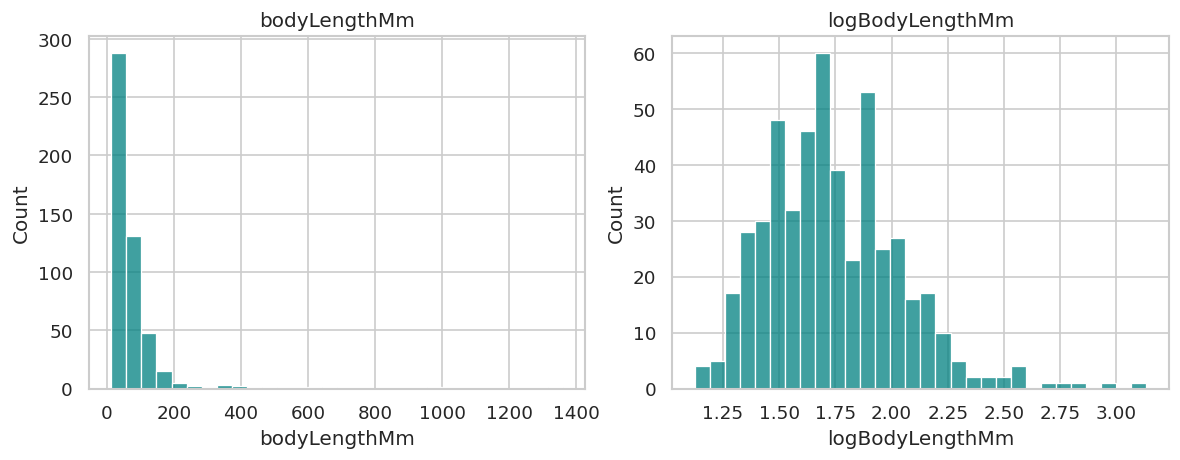

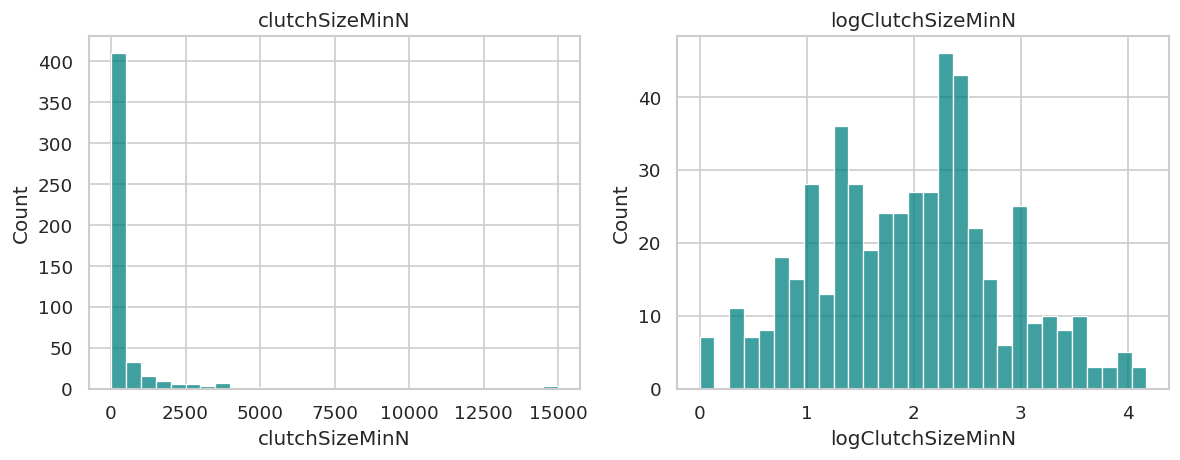

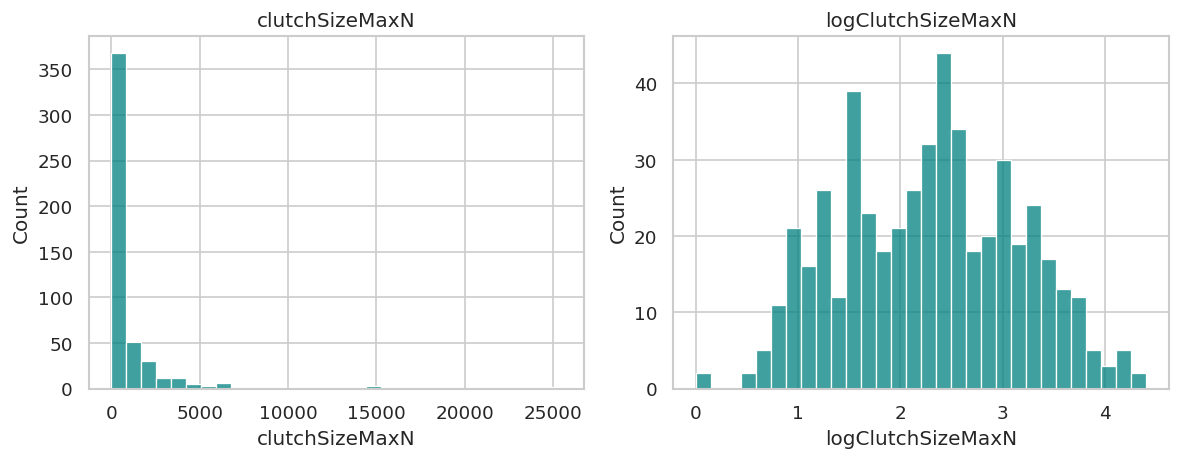

In [ ]:
# Justify log of raw numeric columns (Check data)
traits_raw = [
    "bodyLengthMm",
    "clutchSizeMinN",
    "clutchSizeMaxN"
]

traits_log = [
    "logBodyLengthMm",
    "logClutchSizeMinN",
    "logClutchSizeMaxN"
]

for raw, log in zip(traits_raw, traits_log):
    fig, axes = plt.subplots(1, 2, figsize=(10,4))

    sns.histplot(df[raw], bins=30, ax=axes[0], color="teal")
    axes[0].set_title(raw)

    sns.histplot(df[log], bins=30, ax=axes[1], color="teal")
    axes[1].set_title(log)

    plt.tight_layout()
    plt.show()

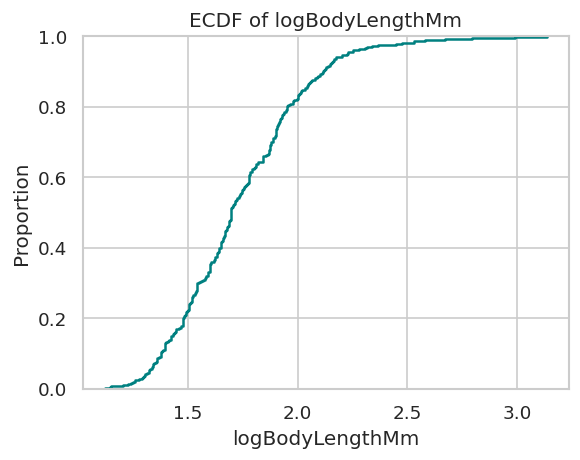

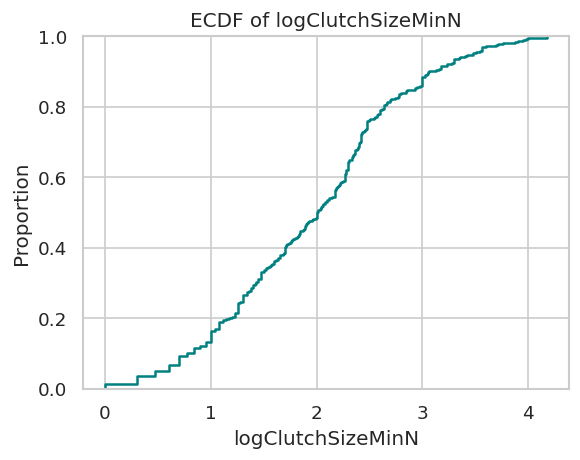

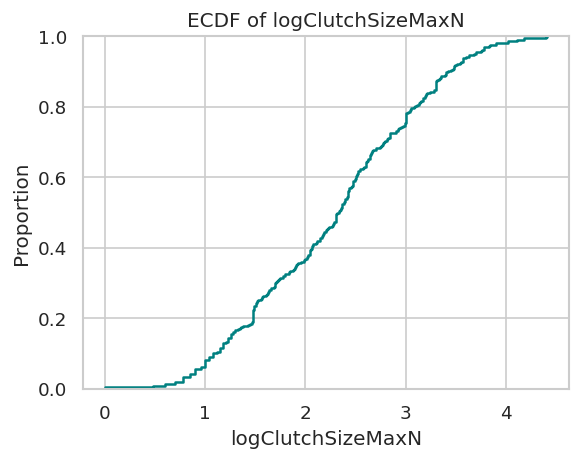

In [ ]:
#ECDF of log numeric trait (Check Data)
for trait in traits_log:
    plt.figure(figsize=(5,4))
    sns.ecdfplot(data=df, x=trait, color="teal")
    plt.title(f"ECDF of {trait}")
    plt.tight_layout()
    plt.show()

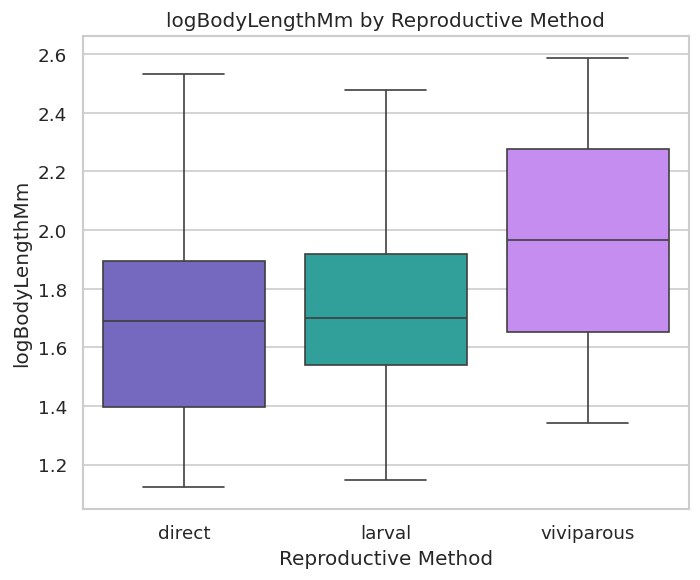

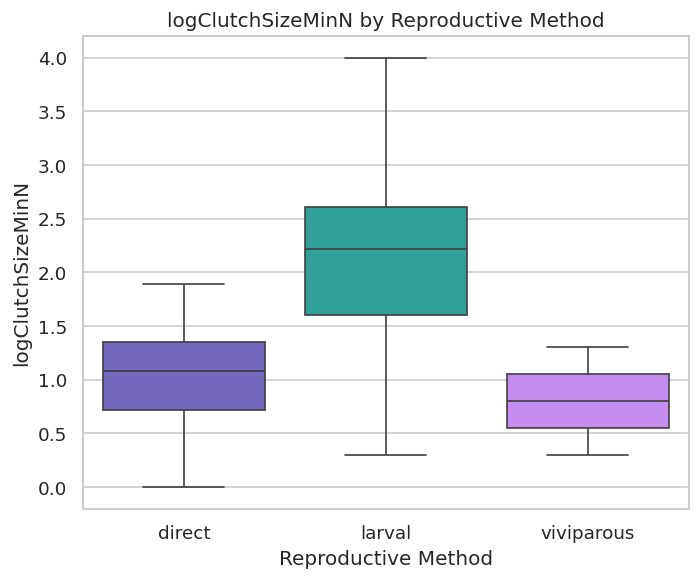

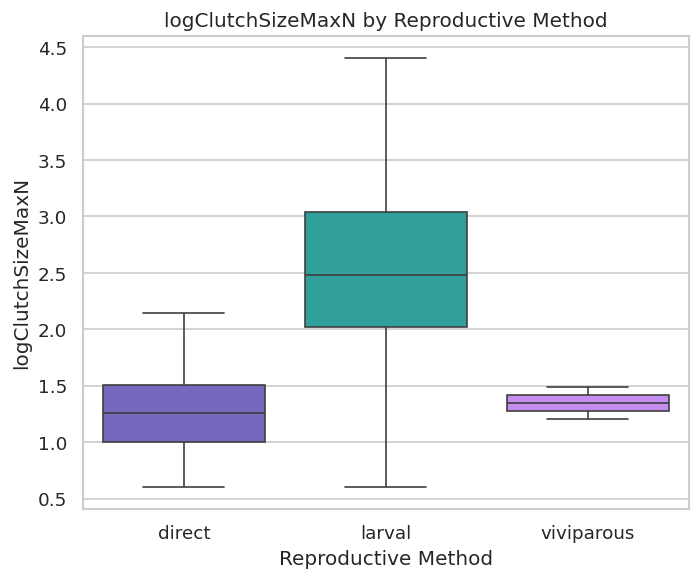

In [ ]:
# Boxplot distributions log-transformed traits across reproductive methods

for trait in traits_log:
    plt.figure(figsize=(6,5))

    sns.boxplot(
        data=df,
        x="reproductiveMethod",
        y=trait,
        palette=jewel,
        showfliers=False
    )

    plt.title(f"{trait} by Reproductive Method")
    plt.xlabel("Reproductive Method")
    plt.ylabel(trait)
    plt.tight_layout()
    plt.show()

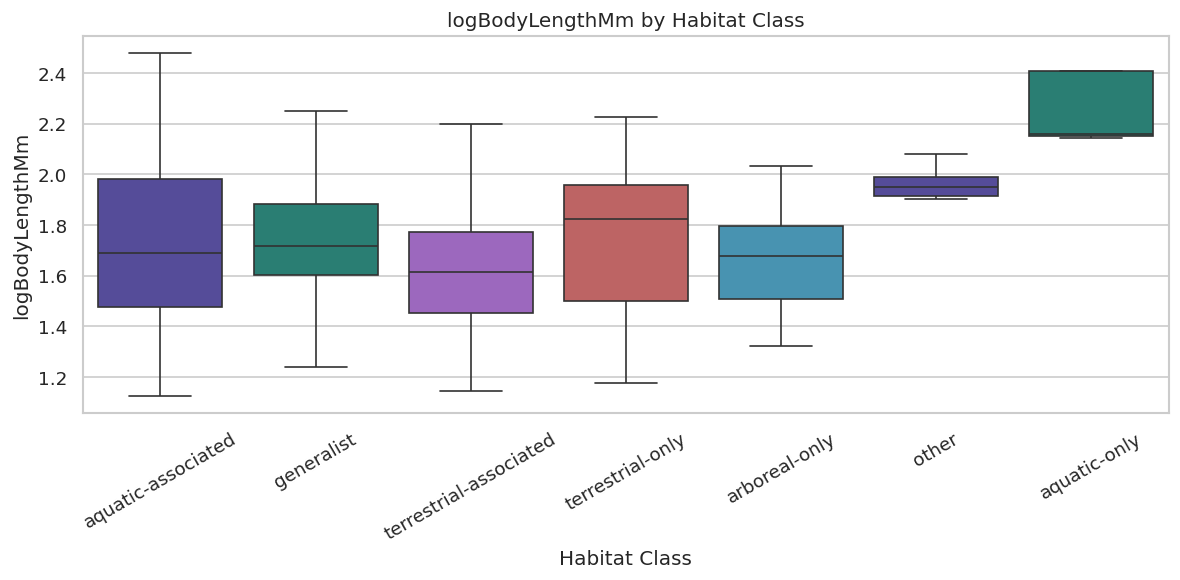

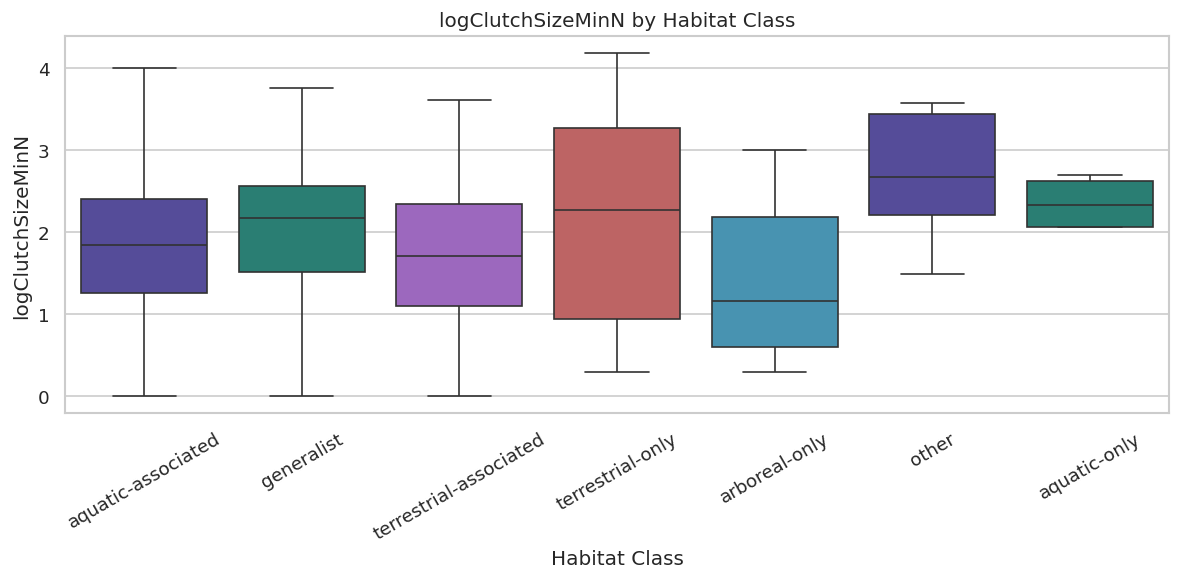

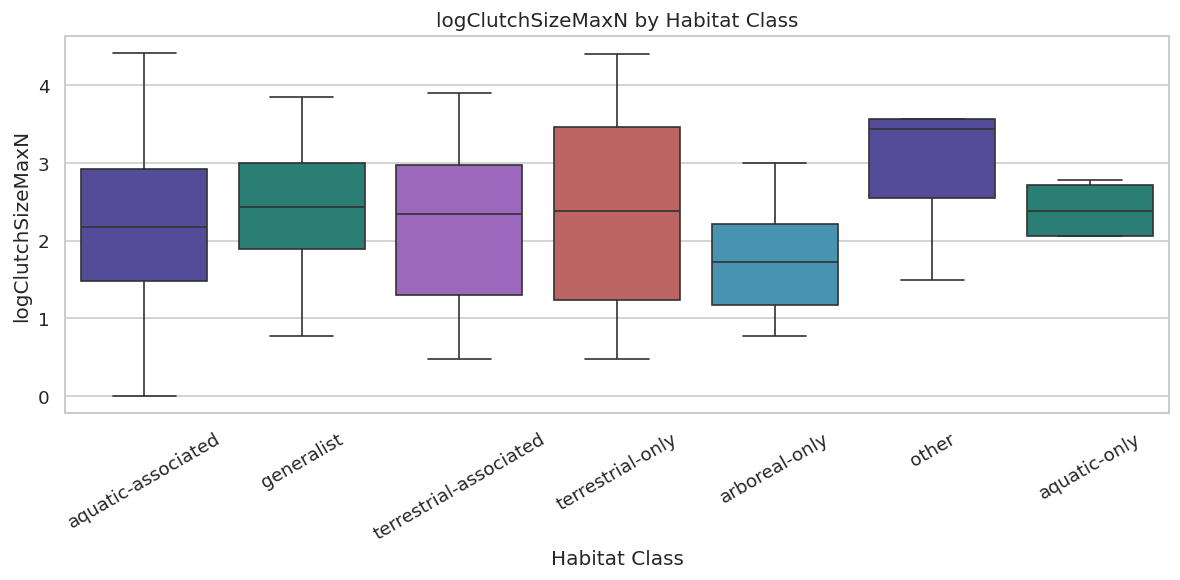

In [ ]:
# Boxplot distribution log-transformed traits across habitatClass
for trait in traits_log:
    plt.figure(figsize=(10,5))

    sns.boxplot(
        data=df,
        x="habitatClass",
        y=trait,
        palette=jewel_dark,
        showfliers=False
    )

    plt.title(f"{trait} by Habitat Class")
    plt.xlabel("Habitat Class")
    plt.ylabel(trait)
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

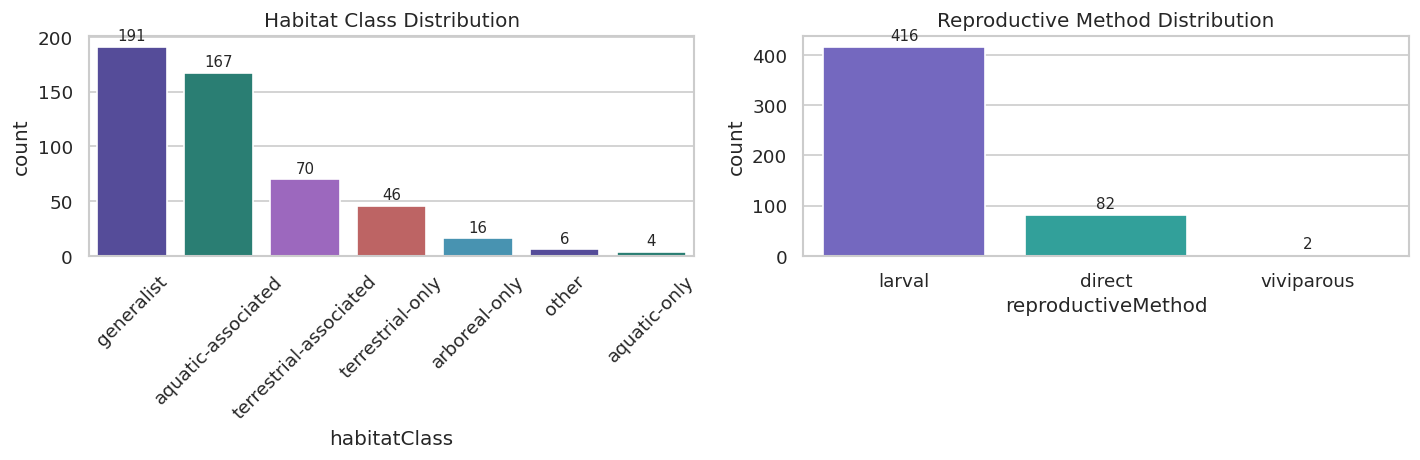

<Figure size 768x576 with 0 Axes>

In [ ]:
# Histograms of freq from habitatClass + Reroductive Method
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

habitat_order = df["habitatClass"].value_counts().index
repro_order   = df["reproductiveMethod"].value_counts().index

sns.countplot(
    data=df, x="habitatClass",
    order=habitat_order,
    palette=jewel_dark,
    ax=axes[0]
)
axes[0].set_title("Habitat Class Distribution")
axes[0].tick_params(axis="x", rotation=45)

sns.countplot(
    data=df, x="reproductiveMethod",
    order=repro_order,
    palette=jewel,
    ax=axes[1]
)
axes[1].set_title("Reproductive Method Distribution")

for ax in axes:
    for container in ax.containers:
        ax.bar_label(container, fontsize=9, padding=2)

plt.tight_layout()
plt.show()

sns.countplot(data=df, x="habitatClass", order=df["habitatClass"].value_counts().index, ax=axes[0])
axes[0].set_title("Habitat Class Distribution")
axes[0].tick_params(axis="x", rotation=45)

sns.countplot(data=df, x="reproductiveMethod", order=df["reproductiveMethod"].value_counts().index, ax=axes[1])
axes[1].set_title("Reproductive Method Distribution")

plt.tight_layout()
plt.show()

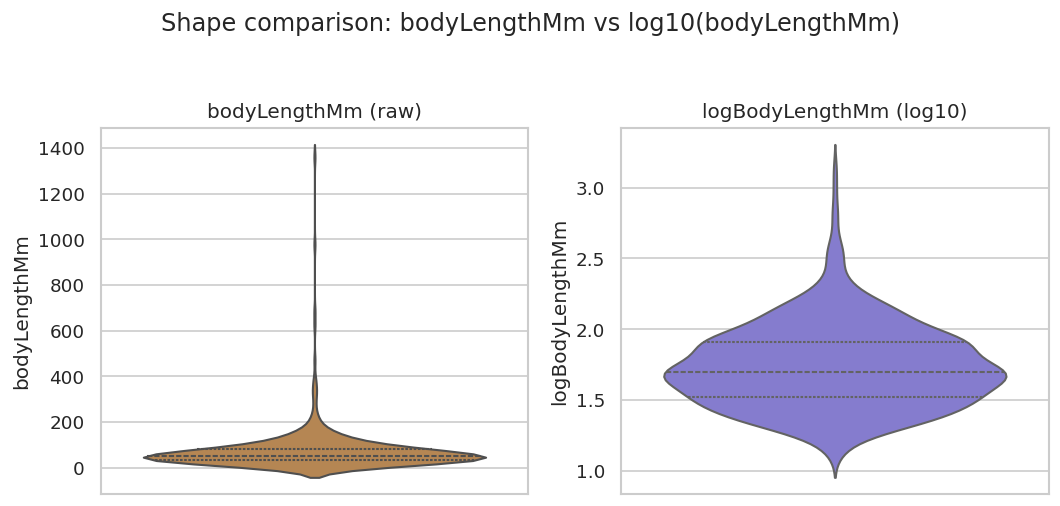

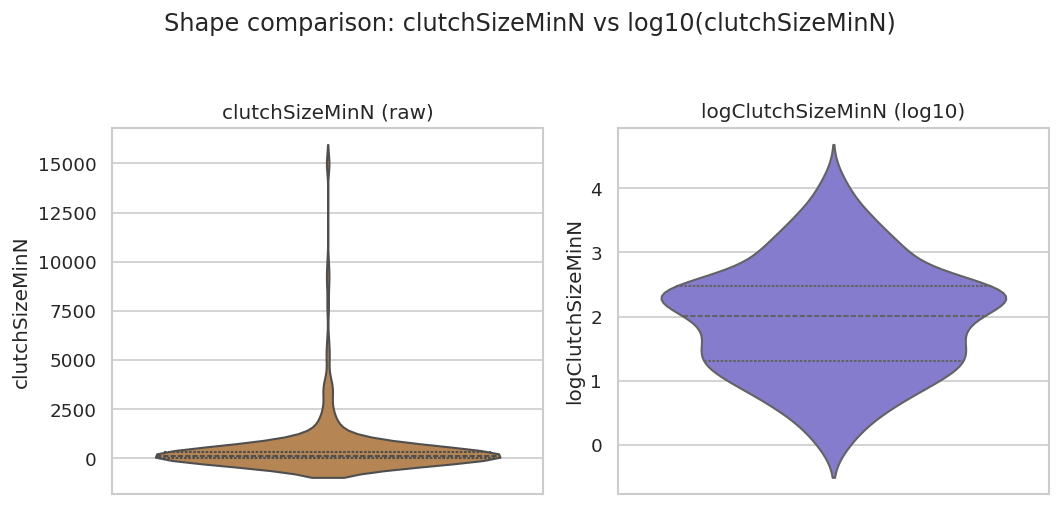

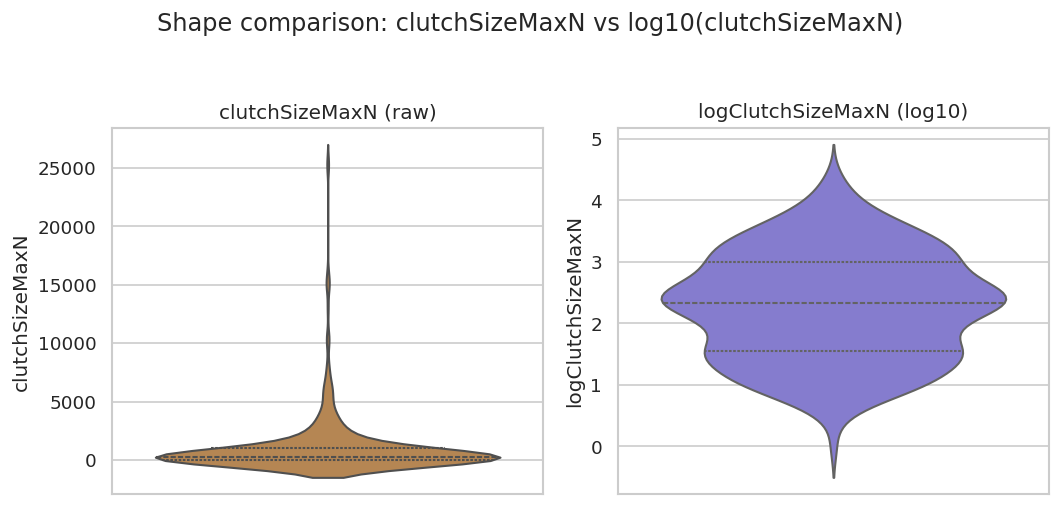

In [ ]:
# Raw vs log10 violin plot trait pairs for shape comparison
raw_log_pairs = [
    ("bodyLengthMm", "logBodyLengthMm"),
    ("clutchSizeMinN", "logClutchSizeMinN"),
    ("clutchSizeMaxN", "logClutchSizeMaxN"),
]

for raw, log in raw_log_pairs:
    fig, axes = plt.subplots(1, 2, figsize=(9, 4), sharey=False)

    sns.violinplot(
        y=df[raw].dropna(),
        ax=axes[0],
        color="#C68642",
        inner="quartile"
    )
    axes[0].set_title(f"{raw} (raw)")
    axes[0].set_xlabel("")
    axes[0].set_ylabel(raw)

    sns.violinplot(
        y=df[log].dropna(),
        ax=axes[1],
        color="#7A6EDC",
        inner="quartile"
    )
    axes[1].set_title(f"{log} (log10)")
    axes[1].set_xlabel("")
    axes[1].set_ylabel(log)

    plt.suptitle(f"Shape comparison: {raw} vs log10({raw})", y=1.05)
    plt.tight_layout()
    plt.show()

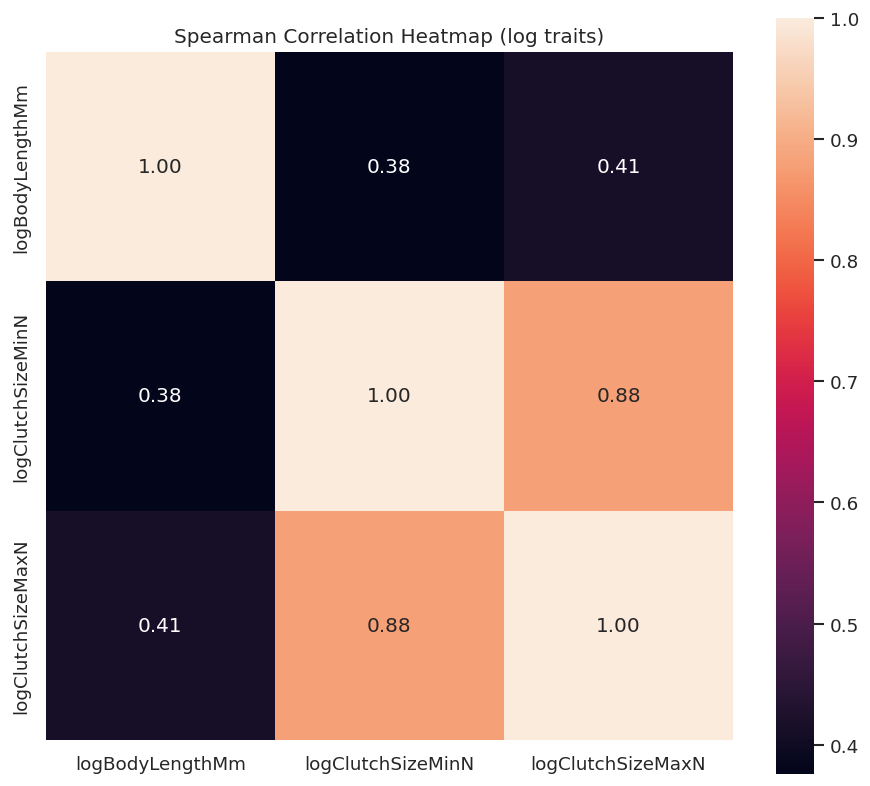

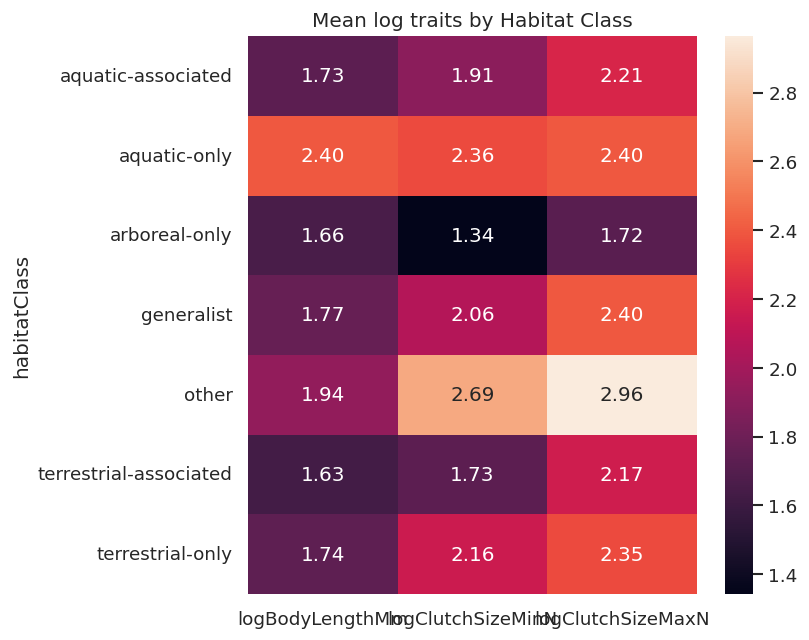

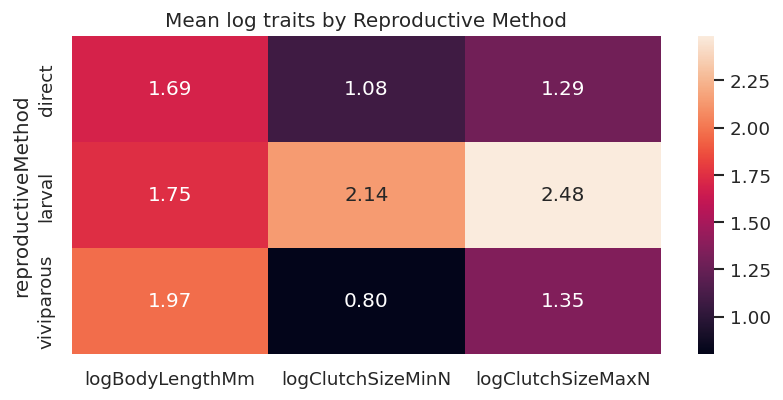

In [ ]:
# Spearman Corr heatmasp

corr = df[log_traits].corr(method="spearman")

plt.figure(figsize=(6 + 0.6*len(log_traits), 5 + 0.6*len(log_traits)))
sns.heatmap(corr, annot=True, fmt=".2f", square=True)
plt.title("Spearman Correlation Heatmap (log traits)")
plt.tight_layout()
plt.show()

# mean by habitatClass
hm_hab = df.groupby("habitatClass")[log_traits].mean()

plt.figure(figsize=(7, 0.5*len(hm_hab) + 2))
sns.heatmap(hm_hab, annot=True, fmt=".2f")
plt.title("Mean log traits by Habitat Class")
plt.tight_layout()
plt.show()

# mean by reproductiveMethod
hm_rep = df.groupby("reproductiveMethod")[log_traits].mean()

plt.figure(figsize=(7, 0.5*len(hm_rep) + 2))
sns.heatmap(hm_rep, annot=True, fmt=".2f")
plt.title("Mean log traits by Reproductive Method")
plt.tight_layout()
plt.show()

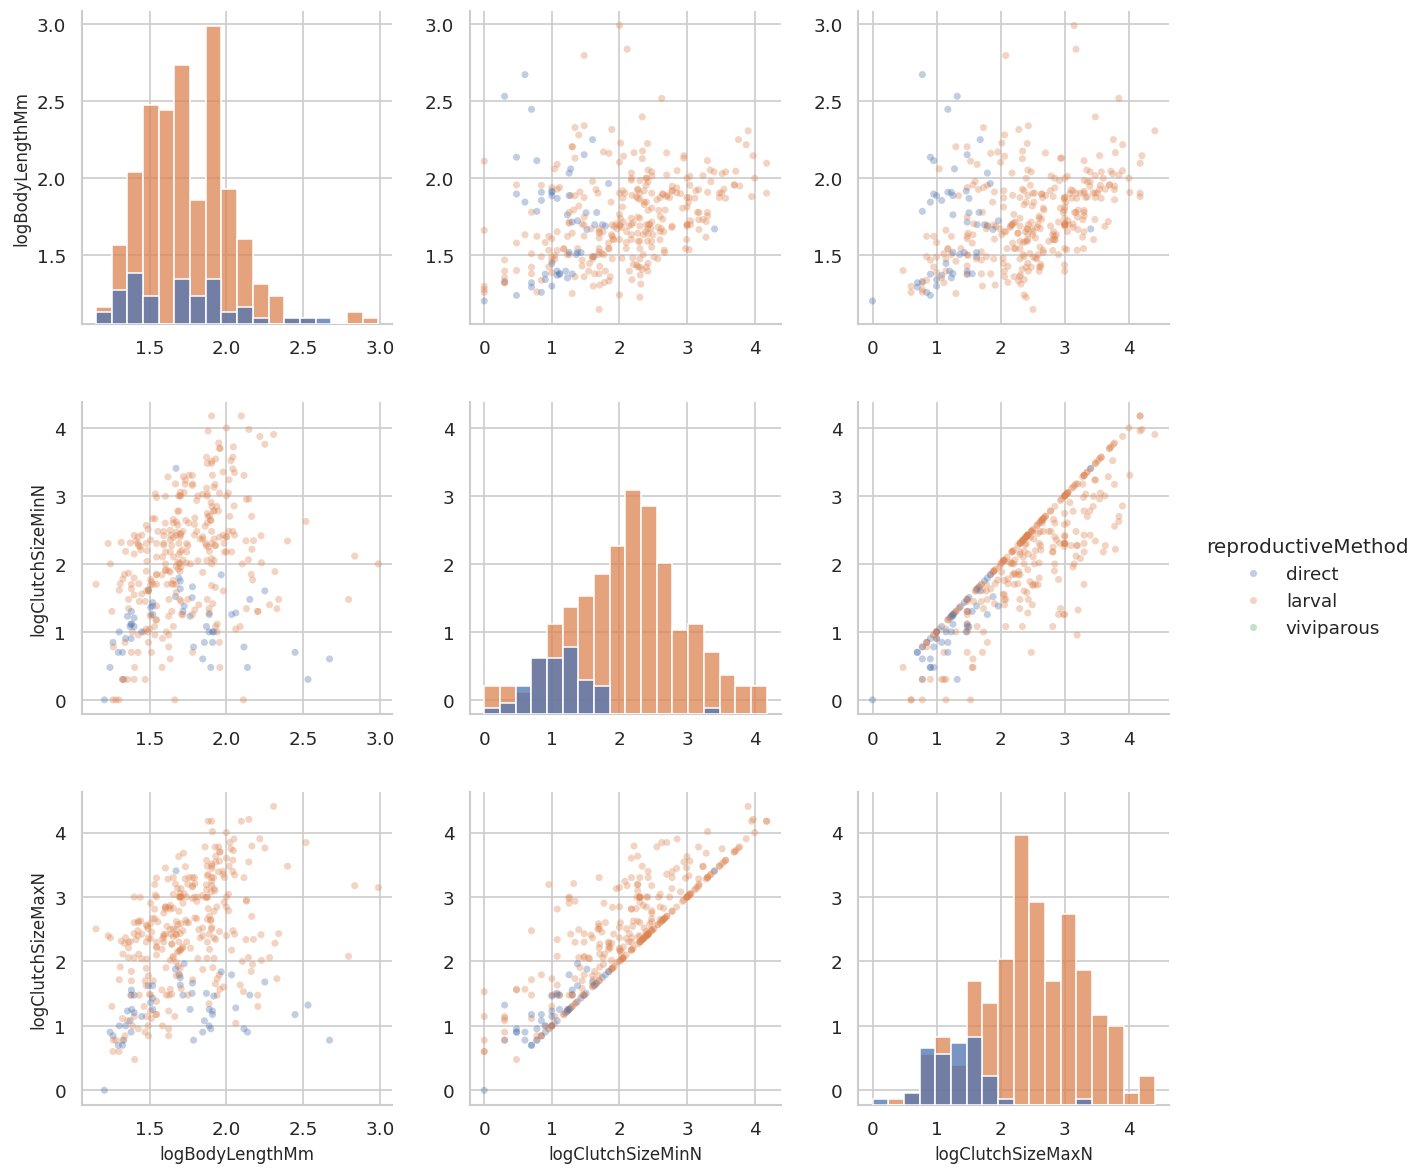

In [ ]:
# Pairwise Relationships w/ log by Reproductive Mode

"""
Pairwise relationships among log-transformed traits showed consistent positive
scaling between body length and clutch size, as well as strong correspondence
between minimum and maximum clutch size estimates (Fig ). Visual inspection
indicated substantial overlap among reproductive modes, motivating formal inferential
testing.
"""

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pair_df = df[log_traits + ["reproductiveMethod"]].copy()

for c in log_traits:
    pair_df[c] = pd.to_numeric(pair_df[c], errors="coerce")
pair_df = pair_df.dropna(subset=log_traits)

# drop viviparous for scaling
pair_df = pair_df[pair_df["reproductiveMethod"] != "viviparous"]

# overplot
pair_df = pair_df.sample(n=min(350, len(pair_df)), random_state=42)

g = sns.pairplot(
    data=pair_df,
    vars=log_traits,
    hue="reproductiveMethod",
    corner=False,
    diag_kind="hist",
    height=3.2,
    aspect=1.0,
    plot_kws={"alpha": 0.35, "s": 18, "edgecolor": "none"},
    diag_kws={"bins": 18, "alpha": 0.75},
)

# spacing
g.fig.subplots_adjust(wspace=0.25, hspace=0.25)
g.fig.set_size_inches(12, 10)

# axis labels
for i, ax_row in enumerate(g.axes):
    for j, ax in enumerate(ax_row):
        if ax is None:
            continue

        ax.tick_params(axis="both", which="both", labelbottom=True, labelleft=True)

        # x axis label
        if i == len(log_traits) - 1:
            ax.set_xlabel(log_traits[j], fontsize=10)
        else:
            ax.set_xlabel("")

        # y axis label
        if j == 0:
            ax.set_ylabel(log_traits[i], fontsize=10)
        else:
            ax.set_ylabel("")

plt.show()

Explained variance ratio: [0.703 0.26  0.037]
Cumulative: [0.703 0.963 1.   ]


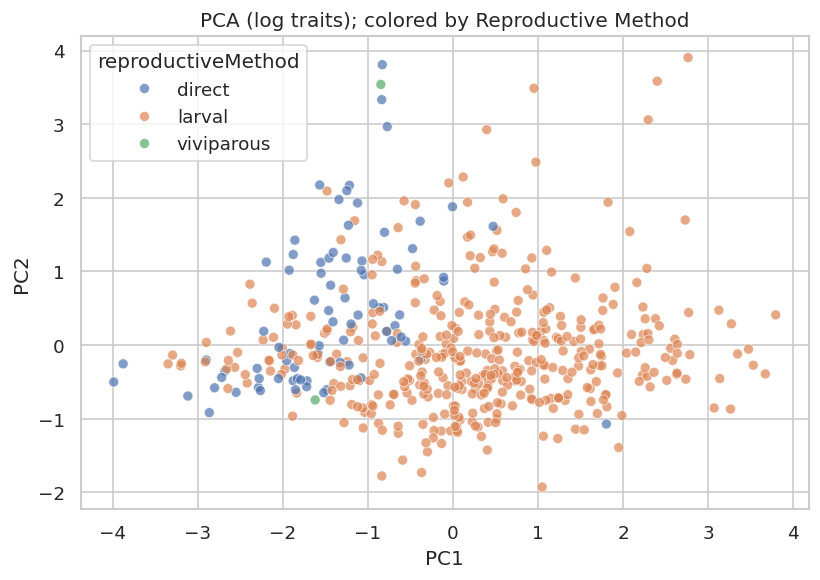

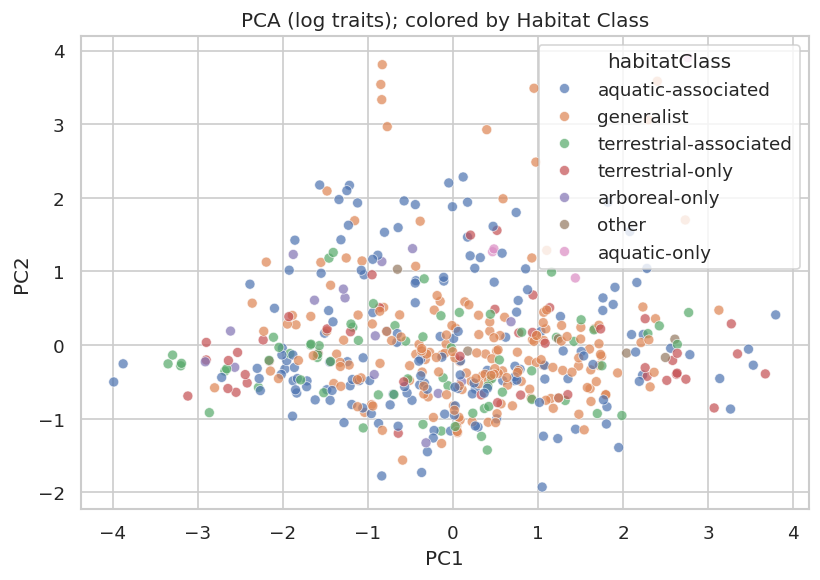

,PC1,PC2,PC3
logBodyLengthMm,0.408652,0.911059,-0.054549
logClutchSizeMinN,0.639406,-0.328427,-0.695195
logClutchSizeMaxN,0.651278,-0.249214,0.716749


In [ ]:
#PCA
X = df[log_traits].apply(pd.to_numeric, errors="coerce")
mask = X.notna().all(axis=1)

X_clean = X.loc[mask].copy()
meta = df.loc[mask, ["habitatClass", "reproductiveMethod"]].copy()

# standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

pca = PCA(n_components=min(5, len(log_traits)))
PC = pca.fit_transform(X_scaled)

pc_df = pd.DataFrame(PC, columns=[f"PC{i+1}" for i in range(PC.shape[1])])
pc_df = pd.concat([pc_df, meta.reset_index(drop=True)], axis=1)

print("Explained variance ratio:", np.round(pca.explained_variance_ratio_, 3))
print("Cumulative:", np.round(np.cumsum(pca.explained_variance_ratio_), 3))

# PC1 vs PC2 by reproductiveMethod
plt.figure(figsize=(7,5))
sns.scatterplot(data=pc_df, x="PC1", y="PC2", hue="reproductiveMethod", alpha=0.7)
plt.title("PCA (log traits); colored by Reproductive Method")
plt.tight_layout()
plt.show()

# PC1 vs PC2 by habitatClass
plt.figure(figsize=(7,5))
sns.scatterplot(data=pc_df, x="PC1", y="PC2", hue="habitatClass", alpha=0.7)
plt.title("PCA (log traits); colored by Habitat Class")
plt.tight_layout()
plt.show()

# Loadings
loadings = pd.DataFrame(
    pca.components_.T,
    index=log_traits,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)]
)
loadings

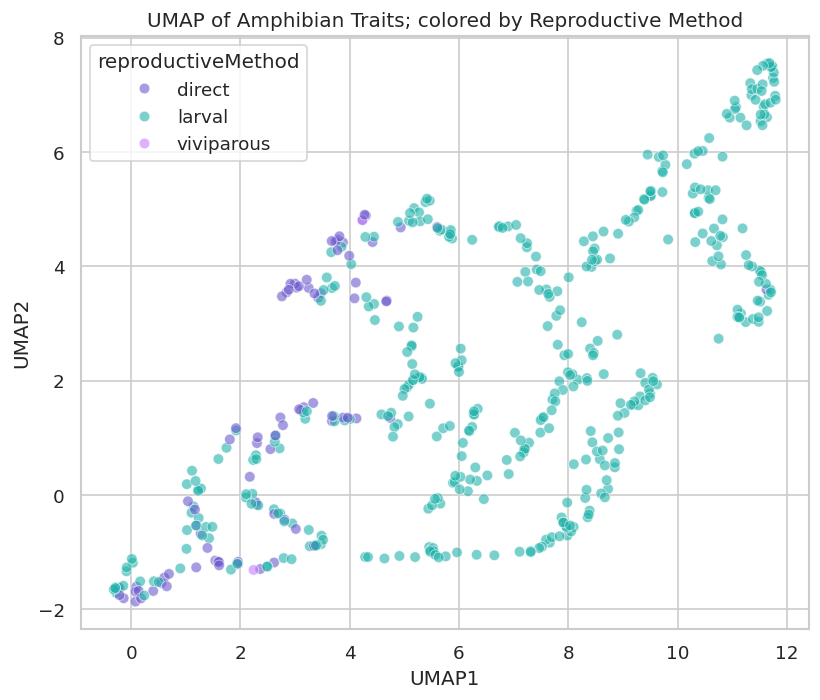

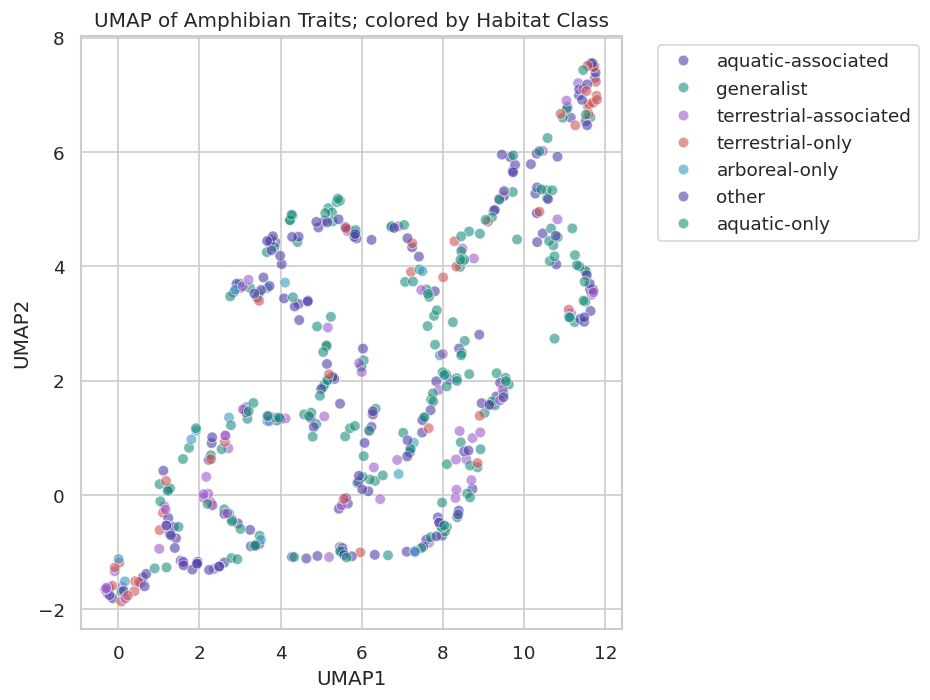

In [ ]:
#UMAP
import umap
from sklearn.preprocessing import StandardScaler

# log for UMAP
umap_features = [
    "logBodyLengthMm",
    "logClutchSizeMinN",
    "logClutchSizeMaxN"
]

X = df[umap_features].dropna()

# Keep metadata
meta = df.loc[X.index, ["habitatClass", "reproductiveMethod"]]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

umap_model = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    n_components=2,
    random_state=42
)

embedding = umap_model.fit_transform(X_scaled)

umap_df = pd.DataFrame(
    embedding,
    columns=["UMAP1", "UMAP2"],
    index=X.index
)

umap_df = pd.concat([umap_df, meta], axis=1)

plt.figure(figsize=(7,6))
sns.scatterplot(
    data=umap_df,
    x="UMAP1",
    y="UMAP2",
    hue="reproductiveMethod",
    palette=jewel,
    alpha=0.6,
    s=40
)

plt.title("UMAP of Amphibian Traits; colored by Reproductive Method")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=umap_df,
    x="UMAP1",
    y="UMAP2",
    hue="habitatClass",
    palette=jewel_dark,
    alpha=0.6,
    s=40
)

plt.title("UMAP of Amphibian Traits; colored by Habitat Class")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [ ]:
"""
Summ:

Descriptive sats on a cleaned random sample of 500 amphibian species from the
AmphiBIO traits dataset. The point here was not to test hypotheses yet,
but understandshow the data, how bad the distributions might be,
and transformations necessary for doing inferential.

Continuous traits:
    - body length (mm)
    - minimum clutch size
    - maximum clutch size

Habitat class and reproductive method were treated as categorical grouping
variables created during cleaning.


Raw vs Log Scale:
On the raw scale, these traits are a heavy skew. Body length is heavily right-skewed,
and clutch size is wrse. On raw plots, almost all observations collapse near zero
After log10 transformation, everything normalizes ish. The distributions
become roughly unimodal, skewness and kurtosis drop a lot, and the mean and
median are no longer wildly separated. This shows up clearly in histograms,
violin plots, and ECDF-style comparisons. Using the log scale is best move


Univariate Descriptives:
For each log-transformed trait, I computed mean, median, SD, IQR, skewness,
and excess kurtosis. None of the log traits show extreme skew or pathological
tails, which supports using parametric summaries and multivariate methods later.
I also checked for redundancy and overplotting. Raw-scale plots are dominated
by outliers and hide structure, while log-scale plots preserve variation without
flattening everything.


Group-Level Patterns:
Once traits are on the log scale, group-level differences become visible and
consistent across plots.

Reproductive method:
    - Larval developers tend to have higher clutch sizes and more spread.
    - Direct developers cluster at lower fecundity values.
    - Viviparous species are very rare in this dataset and were treated cautiously.

Habitat class:
    - Aquatic-associated and generalist species show higher fecundity and wider
      trait ranges.
    - Arboreal-only and terrestrial-only groups tend to have lower medians and
      tighter distributions.
    - Group sizes are very uneven, which matters for interpretation.
These patterns appear across boxplots, violins, and summary tables


Pairwise Structure:
Pairwise plots of the log-transformed traits show clear structure:
    - Minimum and maximum clutch size are strongly correlated.
    - Body length is positively related to clutch size, but with substantial scatter.
    - Reproductive method separates parts of trait space, but there are no clean,
      non-overlapping clusters.
Transparency and spacing were adjusted to deal with overplotting in dense regions


Multivariate View:
Correlation matrices and PCA confirm what the univariate and pairwise plots show.
Some traits dominate overall variance, while body size contributes additional
but smaller structure. In PCA space, habitat class and reproductive method show
partial separation but heavy overlap, suggesting continuous gradients
rather than discrete categories.

UMAP was used as an exploratory, non-linear dimensionality reduction method to visualize
structure in log-transformed life-history traits. The embedding shows continuous gradients
rather than discrete clusters, with partial alignment to reproductive method and habitat class.
This supports the interpretation that these traits vary along overlapping ecological and
developmental axes rather than forming sharply separated groups.
"""

'\nSumm: \n\nDescriptive sats on a cleaned random sample of 500 amphibian species from the\nAmphiBIO traits dataset. The point here was not to test hypotheses yet,\nbut understandshow the data, how bad the distributions might be,\nand transformations necessary for doing inferential.\n\nContinuous traits:\n    - body length (mm)\n    - minimum clutch size\n    - maximum clutch size\n\nHabitat class and reproductive method were treated as categorical grouping\nvariables created during cleaning.\n\n\nRaw vs Log Scale:\nOn the raw scale, these traits are a heavy skew. Body length is heavily right-skewed,\nand clutch size is wrse. On raw plots, almost all observations collapse near zero\nAfter log10 transformation, everything normalizes ish. The distributions\nbecome roughly unimodal, skewness and kurtosis drop a lot, and the mean and\nmedian are no longer wildly separated. This shows up clearly in histograms,\nviolin plots, and ECDF-style comparisons. Using the log scale is best move\n\n\n